# <center>Analysis of global happiness in 2019


### <center>1. What is important for being happy? 
### <center>2. How is happiness distributed in the world?
### <center>3. How good is the Happiness-score predictable by its features?

#### Import, loading and preprocessing Data

In [1]:
# import of needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from scipy import stats
from matplotlib import pyplot

# import of dataset
happy = pd.read_csv("files/2019.csv")

#rename of the columns
happy.rename(columns={"Overall rank": "HappyRk", "Score" : "HappySc", "Country or region" : "Country", 
                       "GDP per capita": "GDP_per_capita", "Healthy life expectancy" : "LifeExp",
                       "Social support": "Family", "Freedom to make life choices": "Freedom",
                       "Perceptions of corruption" : "GovTrust",}, inplace=True)

# adding a column for "Region" from another dataset for regional exploration
df_reg = pd.read_csv("files/df_region-Copy1.csv")
happy = pd.merge(happy, df_reg, on="Country", how = "left")

# Sorting Dataset and dropping not needed columns
happy = happy[['Country', 'ISO_code', 'Region', 'HappyRk', 'HappySc', 'GDP_per_capita', 'Family', 'LifeExp',
      'Freedom', 'Generosity', 'GovTrust']]

# happy.info() shows: No missing values

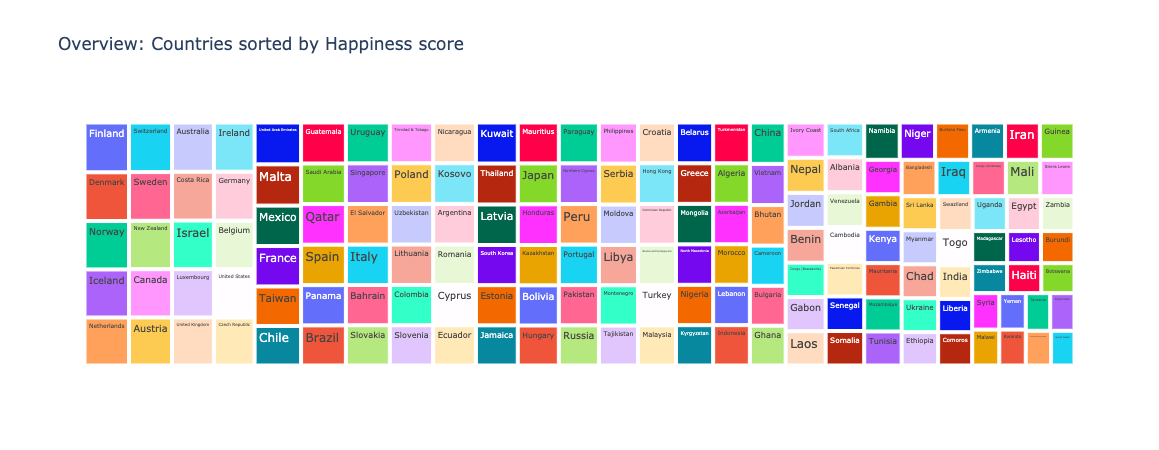

In [2]:
# Giving an coloured overwiew, which is more comfortable than a simple list. Sorted by Ranking (Columns left to right). 
# It's interactive, so you can see the single Happiness-Score of a country
fig = px.treemap(happy, path=["Country"], values='HappySc',title="Overview: Countries sorted by Happiness score")
fig.show()

### <center>The question, which nation has the happiest people is examined and rated by the Global Happiness-Index.
##### <center>The scores and rankings utilize information are from the Gallup World Survey. They are based on answers to the most life evaluation address, known as the Cantril-Ladder, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and to rate their claim current lives on that scale. The factors used to explain the score are
##### <center> GDP per capita,
##### <center> Healthy Life Expectancy
##### <center> Social support (Family)
##### <center> Freedom to make life choices
##### <center> Generosity
##### <center> Corruption Perception (Trust in Government)


### The Cantril-Ladder
![title](img/c.png)

### <center>After preprocessing finished lets see how the Data looks like for the 156 countries

In [3]:
happy.head(3)

Country ISO_code          Region  HappyRk  HappySc  GDP_per_capita  Family  \
0  Finland      FIN  Western Europe        1    7.769           1.340   1.587   
1  Denmark      DNK  Western Europe        2    7.600           1.383   1.573   
2   Norway      NOR  Western Europe        3    7.554           1.488   1.582   

   LifeExp  Freedom  Generosity  GovTrust  
0    0.986    0.596       0.153     0.393  
1    0.996    0.592       0.252     0.410  
2    1.028    0.603       0.271     0.341

# <center> 1. What is important for being happy? 

#### <center> How are the single features correlated with the Happiness-score?
##### <center>To explore this more exactly, we use three different correlation-markers (Heatmap, Linear regression (OLS) and a calculated Pearson-Correlation)
#### <center> First the Correlation-Heatmap

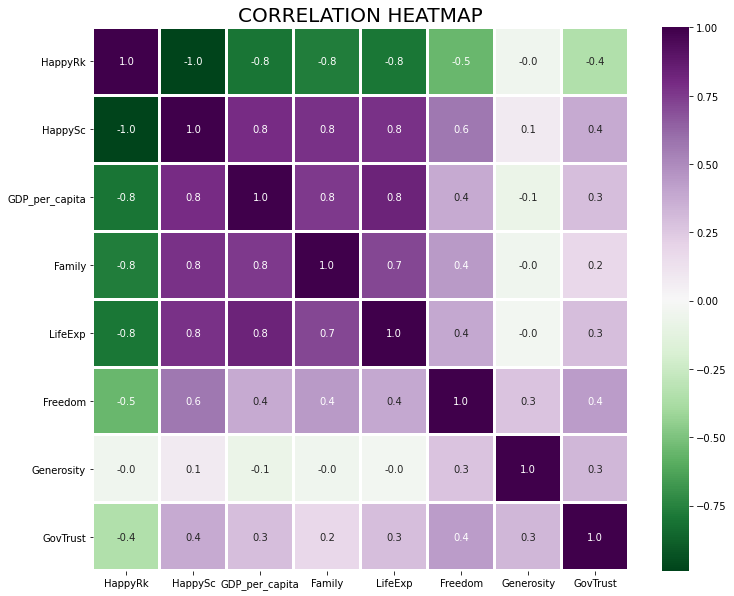

In [4]:
plt.figure(figsize=(12,10)) # Creating size of plot (height, width)
plt.title("CORRELATION HEATMAP",fontsize=20) #adding title and its fontsize

# creating colored heatmap (cmap), annot = "True" puts the values in, fmt formats this value 
# and the linewidhts define the distance of the coloured clusters
sns.heatmap(data=happy.corr(),cmap="PRGn_r",annot=True, fmt='.1f', linewidths=2)

plt.show()

#### <center> Here the GDP-per-capita, Family and Life Expectancy are strongly correlated with the Happiness score. 
#### <center> Second let's check if a linear regression (OLS) confirms this (result = R-Squared).

In [5]:
import statsmodels.api as sms #import module

a = list(happy.columns.values) # Creating the list with the features 
del a[0:4] # dropping not needed features out of the list

# Creating a function for my runthrough
def rsq(c):
    for i in a: # every single feature from "a" per loop
        X = happy[[i]] # The feature in this loop
        X = sms.add_constant(X) # fits also the intercept
        y = happy.HappySc # my dependent feature
        model = sms.OLS(y, X) #define the model, here "OLS"
        results = model.fit() # a variable for the result
        print(i + ": " + str(results.rsquared.round(2))) # and the printing function to show the R-Squared

In [6]:
rsq(a)

HappySc: 1.0
GDP_per_capita: 0.63
Family: 0.6
LifeExp: 0.61
Freedom: 0.32
Generosity: 0.01
GovTrust: 0.15


#### <center> Here also the GDP-per-capita, Family and Life Expectancy have the strongest correlation with the Happiness score. 
### <center>See the linearity between GDP per capita and the Happiness-Score in the plot below.

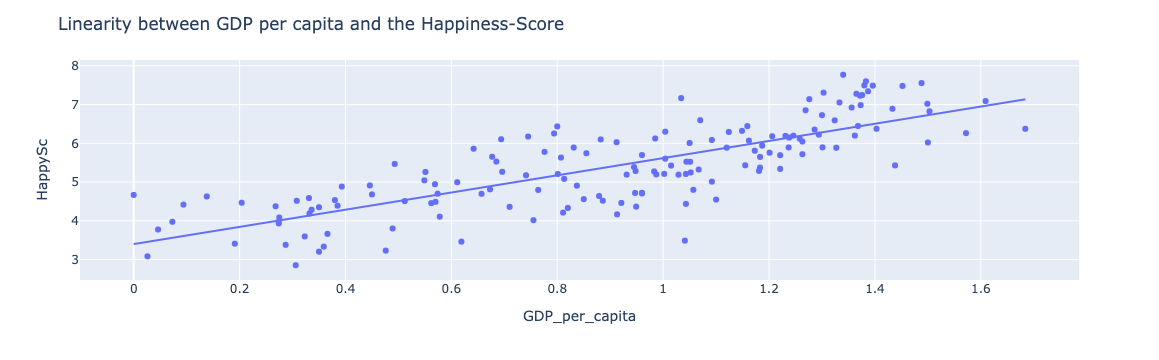

In [7]:
# Interactive plot with every single country and its values for GDP per capita and the Happiness-Score
# Also predicted values from OLS on every point of the line
fig = px.scatter(happy, x="GDP_per_capita", # selected features
                 y="HappySc",
                 # color = "Country", I wanted coloured dots, but then the OLS-line vanishes? 
                 hover_name="Country", # show Countryname
                trendline= "ols") # show Ordinary least squares line with predicted value

# Defining height and title
fig.update_layout(
    height=300,
    title_text='Linearity between GDP per capita and the Happiness-Score'
)
fig.show()

### <center> At last we calculate the Pearson-Correlation

In [8]:
# Calculating with scipy-stats-module for every single feature
gdp = scipy.stats.pearsonr(happy['HappySc'], happy['GDP_per_capita'])
fam = scipy.stats.pearsonr(happy['HappySc'], happy['Family'])
lif = scipy.stats.pearsonr(happy['HappySc'], happy['LifeExp'])
fre = scipy.stats.pearsonr(happy['HappySc'], happy['Freedom'])
gen = scipy.stats.pearsonr(happy['HappySc'], happy['Generosity'])
gov = scipy.stats.pearsonr(happy['HappySc'], happy['GovTrust'])

#Printing the results
print("THE RESULTS FOR PEARSON CORRELATION ARE:")
print('GDP =                   ', round(gdp[0],2))#, '   pvalue = ', round(c1[1],4))
print('Family =                ', round(fam[0],2))#, '   pvalue = ', round(c2[1],4))
print('Health-Life expectancy= ', round(lif[0],2))# '   pvalue = ', round(c3[1],4))
print('Freedom=                ', round(fre[0],2))#, '   pvalue = ', round(c4[1],4))
print('Generosity=             ', round(gen[0],2))#, '   pvalue = ', round(c5[1],4))
print('Trust in Government=    ', round(gov[0],2))#, '   pvalue = ', round(c6[1],4))

THE RESULTS FOR PEARSON CORRELATION ARE:
GDP =                    0.79
Family =                 0.78
Health-Life expectancy=  0.78
Freedom=                 0.57
Generosity=              0.08
Trust in Government=     0.39


#### <center> So it is confirmed that GDP-per-capita, Family and Life Expectancy have the strongest correlation. 
#### <center> Generosity has nearly no correlation in all three models. 

#### To complete this chapter, we look at another survey for Happiness made by [IPSOS](https://www.ipsos.com/sites/default/files/ct/news/documents/2019-08/Happiness-Study-report-August-2019.pdf) in 2019. They asked for the sources of Happiness in detail. The next graphic shows how important the single features are wheighted by the participants of this alternative survey.

#### Ipsos Happiness survey 2019 - What is important?
![title](img/Ipsos03.png)

#### While health is number one and financial dependencies are on 2., 8., 10., 12., 17. and 18. (20 % of the features) , we see that the high correlation of our features from the Dataset is also confirmed in detail from another source. 

## <center> Conclusion:
## <center>Happiness depends mainly on money, health and our social environment

# <center> 2. How is happiness distributed in the world? 

#### <center>As the World Happiness Index only considers countries, I added a feature with "regions" to the dataset to explore if there are regional aspects. I decided to explore more than only the 5 continents. 
### <center>So this are the regions I took:

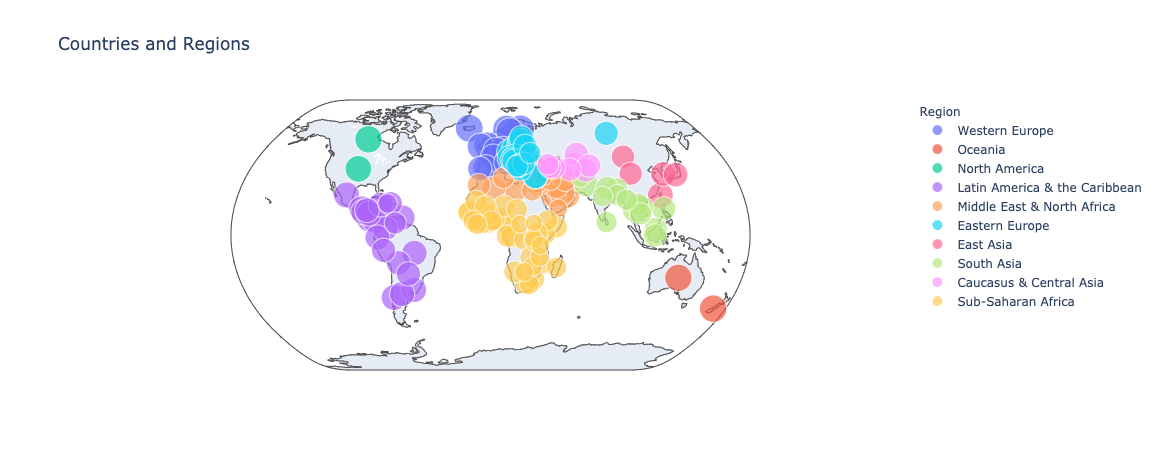

In [9]:
from plotly.offline import init_notebook_mode, iplot # importing iplot

# settings for my interactive geo-plot, countries = dots, regions = coloured
fig = px.scatter_geo(happy, 
                     locations='ISO_code',
                     color='Region',
                     size="HappySc", hover_name='Country', 
                     projection="natural earth", 
                     title='Countries and Regions',
                    )
iplot(fig)

#### <center> Is happiness only dependent on the situation in every single Country, or is there also a significant difference between the regions.
#### <center>First take a look, how high is the mean of the Happiness-Score for every region?

In [10]:
# creating a simple and fast code just to list the means, better view on the graph below
a = happy[['Region', 'HappySc']] #small Frame
a = a.groupby('Region').mean() # groupby the mean (Happy-Score) after Region
print("Mean of Happiness-Score by region")
a.sort_values('HappySc', ascending=False) # show in order happier to unhappier

Mean of Happiness-Score by region


HappySc
Region                                 
Oceania                        7.267500
North America                  7.085000
Western Europe                 7.035278
Latin America & the Caribbean  5.954429
East Asia                      5.688833
Eastern Europe                 5.670458
Caucasus & Central Asia        5.280500
Middle East & North Africa     5.237000
South Asia                     4.946938
Sub-Saharan Africa             4.300050

#### <center> As you see, there is a significant distribution of Happiness between the regions.
#### <center> Let's take a deeper look

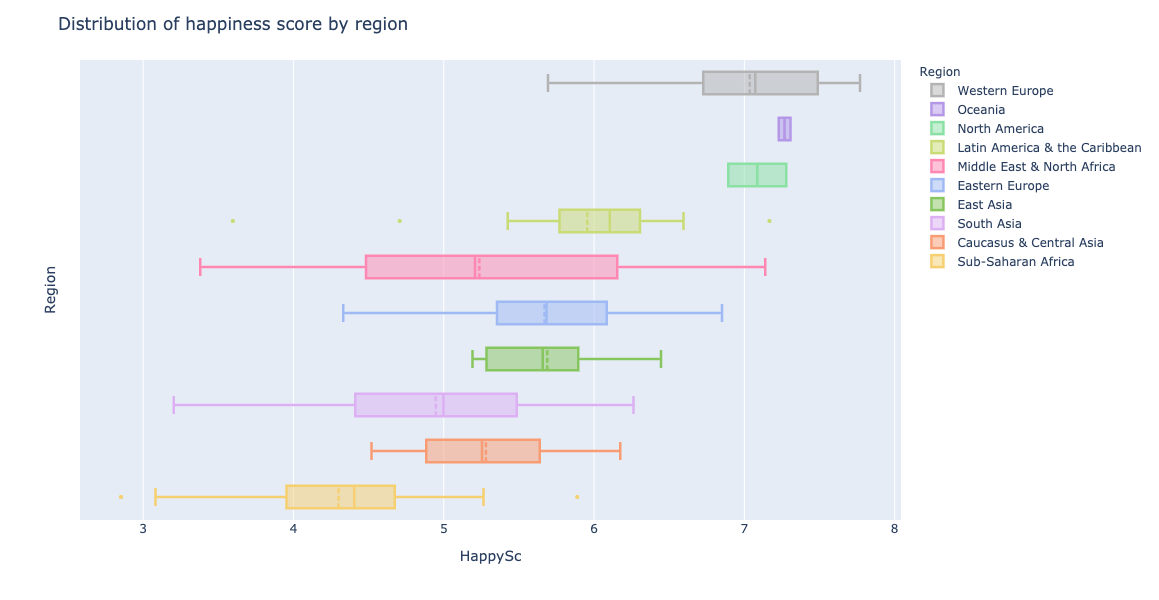

In [11]:
# creating an interactive boxplot with min, max, mean, median and the q1 and q3-quartiles
fig = px.box(happy,
             x="HappySc",
             y="Region",
             color="Region",
             color_discrete_sequence=px.colors.qualitative.Pastel_r,) # used colorscale for this plot

# Defining inside of the plot
fig.update_traces(boxmean=True, # represents mean
                  whiskerwidth=0.8, # endline on min and max
                  marker_size=4, # size of the residuals (points)
                  line_width=2.5 # widht of the lines and frames
                 
                  )

# defining height, width, legend and title of the plot
fig.update_layout(height=600,
                  width=800,
                  showlegend=True, # shows the (Region-) legend on the right
                  yaxis= dict(showticklabels = False), # Because of "showlegend" - here: False to not double the labels
                  title="Distribution of happiness score by region")
fig.show()

### <center> Western Europe, Oceania and North America are far happier than the rest of the world

### <center>How does this reflect on the world map?

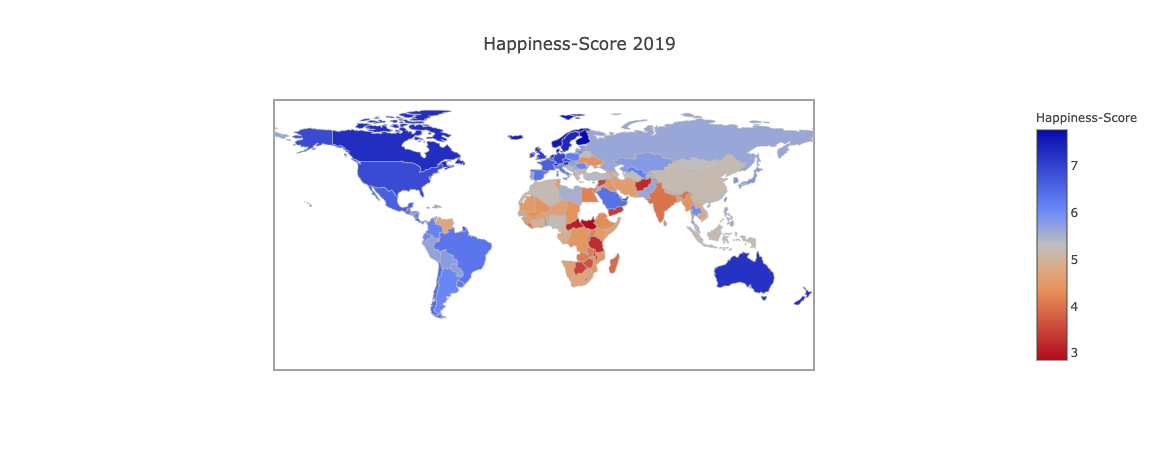

In [12]:
# crerating an interactive geoplot to show the global wheighted distribution of Happiness

import plotly.offline as py # import of the needed module

happyplot = [dict(
    type = 'choropleth', # type of the geoplot
    locations = happy['Country'], 
    locationmode = 'country names', # fitting the Data with the plot presets
    z = happy['HappySc'], # show Happyscore by interaction with the plot
    text = happy['Country'], # show Country-name by interaction with the plot
    colorscale = [[0,"rgb(5, 10, 172)"],[2,"rgb(40, 60, 190)"],[4,"rgb(70, 100, 245)"],\
                [6,"rgb(90, 120, 245)"],[8,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]], # copied a colorscale whisch I want to use
    autocolorscale = False, # True changes in another color-scheme
    reversescale = True, # False turns the color bar around 
    marker = dict(line = dict(color = 'rgb(180,180,180)',width = 0.5 )), # settings for the plot
    colorbar = dict(autotick=False, tickprefix= '', title='Happiness-Score'), # defining colorbar and its title
)]

# defining title and the projection-type, show black frame around the plot and hide the coastlines (and the poles)
layout = dict(
    title = 'Happiness-Score 2019', # title of the plot
    geo = dict(showframe=True, showcoastlines=False, projection=dict(type='Mercator'))
)

fig = dict(data=happyplot, layout=layout) # establish the given presets
py.iplot( fig, validate=False) # plotting with avoid of validation

### <center>The distribution on this map shows clearly the strong correlation of regions for being happy
#### <center> The happiest regions are Western Europe, Oceania and North America
#### <center> South America, Eastern Europe and Asia are okay
#### <center>Africa, most of the Middle East and South Asia are in the struggling or suffering area of the Cantril-Ladder

### <center>Interesting observation on the edge: Democratical systems (here: green) are very similar distributed
#### <center>The happiest regions are 100 % democratic

### World democracy map
![title](img/democracy.png)

# <center>3. How good is the Happiness-Score predictable by its features?

### <center> First I try different regression-models with all given features to see which is the best.
#### <center> I take two linear models (Linear Regression and Bayesian Ridge), a Decision-Tree and, as an ensemble-method, a Random Forest-Regression

In [13]:
# Importing the regression-modules for Linear-, Tree- and Ensemble-Regression

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing train_test_split-module
from sklearn.model_selection import train_test_split # for data validation

# Metrics and Grid Search
from sklearn import model_selection, metrics

In [14]:
# Creating the table with all given features
data_model = happy.groupby('Country')['HappySc', 'GDP_per_capita',
       'Family', 'LifeExp',
       'Freedom', 'Generosity',
       'GovTrust'].mean().reset_index()

# Determining the dependent and independent variables
y = data_model['HappySc']
X = data_model[['GDP_per_capita',
       'Family', 'LifeExp',
       'Freedom', 'Generosity',
       'GovTrust']]

# Splitting the data to avoid under/overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#Can't get the following FutureWarning away. If I use a list like suggested, it doesn't worked

<ipython-input-14-66c392d8ccb1>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [15]:
# Creating a predefined function to test the models
a = [] # A list for help printing
def modelfit(model): #function as a basic for all predictive models
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, preds)
    a.append(round(mae,3))

# Running every model

# Linear Regression
lm = LinearRegression(n_jobs = 10000)
modelfit(lm)
    
# Bayesian Linear Model
br = BayesianRidge(n_iter=1000, tol = 0.5)
modelfit(br)

# Decision Tree Regression
dt = DecisionTreeRegressor()
modelfit(dt)

# Ensemble Method: Random Forest
rf = RandomForestRegressor(n_jobs = 1300)
modelfit(rf)

#print-function to see the results together
print('Linear Regression has a MAE of:    ' + str(a[0]))
print('Bayesian Linear Model has a MAE of:' + str(a[1]))
print('The Decision Tree has a MAE of:    ' + str(a[2]))
print('Random Forest has a MAE of:        ' + str(a[3]))

Linear Regression has a MAE of:    0.403
Bayesian Linear Model has a MAE of:0.406
The Decision Tree has a MAE of:    0.516
Random Forest has a MAE of:        0.376


### <center>The Random Forest method gives the best result by using every feature of the Original-Dataset
### <center>After we have seen that also the "region" is significant, let us try if we can optimize the prediction

#### First I create a new column "RgCode" with a numeric code for the regions

In [16]:
# Creating a column with numeric code for the region
happy.Region = pd.Categorical(happy.Region) # First, I change the type of the column into "Categorial"
happy['RgCode'] = happy.Region.cat.codes # Now I create a new column "RgCode" and add it to my dataset
happy.head()

Country ISO_code          Region  HappyRk  HappySc  GDP_per_capita  \
0      Finland      FIN  Western Europe        1    7.769           1.340   
1      Denmark      DNK  Western Europe        2    7.600           1.383   
2       Norway      NOR  Western Europe        3    7.554           1.488   
3      Iceland      ISL  Western Europe        4    7.494           1.380   
4  Netherlands      NLD  Western Europe        5    7.488           1.396   

   Family  LifeExp  Freedom  Generosity  GovTrust  RgCode  
0   1.587    0.986    0.596       0.153     0.393       9  
1   1.573    0.996    0.592       0.252     0.410       9  
2   1.582    1.028    0.603       0.271     0.341       9  
3   1.624    1.026    0.591       0.354     0.118       9  
4   1.522    0.999    0.557       0.322     0.298       9

In [17]:
# Looking for the dtype
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         156 non-null    object  
 1   ISO_code        156 non-null    object  
 2   Region          156 non-null    category
 3   HappyRk         156 non-null    int64   
 4   HappySc         156 non-null    float64 
 5   GDP_per_capita  156 non-null    float64 
 6   Family          156 non-null    float64 
 7   LifeExp         156 non-null    float64 
 8   Freedom         156 non-null    float64 
 9   Generosity      156 non-null    float64 
 10  GovTrust        156 non-null    float64 
 11  RgCode          156 non-null    int8    
dtypes: category(1), float64(7), int64(1), int8(1), object(2)
memory usage: 14.1+ KB


In [18]:
# Changing the dtype of my "Region"-column back from categorical to object
happy["Region"] = happy.Region.astype(str)

#### Now we take the region into consideration to see if we can decrease the mean absolute error of our prediction at the best model

In [19]:
# Creating the new table with 'RgeCode' inside
data_model = happy.groupby('Country')['HappySc', 'GDP_per_capita',
       'Family', 'LifeExp','Freedom', 'Generosity', 'RgCode',
       'GovTrust'].mean().reset_index()

# Creating the dependent and independent variables
y = data_model['HappySc']
X = data_model[['GDP_per_capita','Family', 'LifeExp', 'Generosity', 'RgCode',
       'Freedom', 'GovTrust']]

# Splitting the data to avoid under/overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#Like before I can't get the following FutureWarning away.

<ipython-input-19-73a17a84343c>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
# Running Random Forest with added feature "Region"
rfr = RandomForestRegressor(n_jobs = 1300, n_estimators=1000) # Adding also estimaters as a hyperparameter
modelfit(rfr)
print('Random Forest without "Region" has a MAE of:     ' + str(a[3]) + ' and')
print('Random Forest with "Region" has a MAE of:        ' + str(a[4]))

Random Forest without "Region" has a MAE of:     0.376 and
Random Forest with "Region" has a MAE of:        0.351


#### <center>Like I thought the consideration of the additional feature decreases the mean absolute error for a better result.
#### <center>Let's have a look on the feature importance of this final model

In [21]:
# import modules for measuring feature-importance for my best model
from sklearn.metrics import r2_score # using R-Squared as metrics
# from sklearn.metrics import mean_absolute_error
from rfpimp import permutation_importances 

#def mae(rfr, X_train, y_train):
#    return mean_absolute_error(y_train, rfr.predict(X_train))
def r2(rfr, X_train, y_train):
    return r2_score(y_train, rfr.predict(X_train))
importance = permutation_importances(rfr, X_train, y_train, r2)

# And always the same future warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [25]:
print("Feature importance of the best model")
print("")
print(importance)

Feature importance of the best model

                Importance
Feature                   
Family            0.305696
GDP_per_capita    0.274522
LifeExp           0.118055
Freedom           0.083754
Generosity        0.019400
GovTrust          0.018844
RgCode            0.018467


## <center> Conclusion

#### <center> After several runthroughs 